In [45]:
import pandas as pd

In [194]:
df = pd.read_csv('flights_dataset.csv', index_col=0)
print(df.shape)
print(df.columns)

(300153, 11)
Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')


In [195]:
df = df.groupby(['airline', 'class']).head(5000)

In [196]:
df.airline.value_counts()

airline
Air_India    10000
Vistara      10000
AirAsia       5000
SpiceJet      5000
GO_FIRST      5000
Indigo        5000
Name: count, dtype: int64

In [197]:
df.source_city.value_counts()

source_city
Delhi        36911
Mumbai        2347
Bangalore      742
Name: count, dtype: int64

In [198]:
df.destination_city.value_counts()

destination_city
Mumbai       15296
Bangalore    12935
Kolkata       6822
Delhi         1801
Chennai       1713
Hyderabad     1433
Name: count, dtype: int64

In [199]:
df.departure_time.value_counts()

departure_time
Evening          10445
Morning           8764
Early_Morning     8634
Afternoon         7413
Night             4474
Late_Night         270
Name: count, dtype: int64

In [200]:
df.arrival_time.value_counts()

arrival_time
Night            12624
Evening           8640
Morning           8290
Afternoon         6010
Early_Morning     2337
Late_Night        2099
Name: count, dtype: int64

In [201]:
df.stops.value_counts()

stops
one            31246
zero            7574
two_or_more     1180
Name: count, dtype: int64

In [202]:
df['class'].value_counts()

class
Economy     30000
Business    10000
Name: count, dtype: int64

In [203]:
print(df['duration'].min())
print(df['duration'].max())

1.33
36.92


In [204]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [205]:
flight_df = df.drop('flight', axis=1)
flight_df['class'] = flight_df['class'].apply(lambda x: 1 if x=='Business' else 0)
flight_df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955


In [206]:
flight_df['stops'] = pd.factorize(flight_df['stops'])[0]
flight_df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [207]:
flight_df.columns = flight_df.columns.str.lower()
flight_df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [208]:
flight_df = flight_df.join(pd.get_dummies(flight_df['airline'], prefix='airline').astype(int)).drop('airline', axis=1)
flight_df = flight_df.join(pd.get_dummies(flight_df['source_city'], prefix='s_city').astype(int)).drop('source_city', axis=1)
flight_df = flight_df.join(pd.get_dummies(flight_df['destination_city'], prefix='d_city').astype(int)).drop('destination_city', axis=1)
flight_df = flight_df.join(pd.get_dummies(flight_df['arrival_time'], prefix='arr_time').astype(int)).drop('arrival_time', axis=1)
flight_df = flight_df.join(pd.get_dummies(flight_df['departure_time'], prefix='dep_time').astype(int)).drop('departure_time', axis=1)
flight_df.head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arr_time_Evening,arr_time_Late_Night,arr_time_Morning,arr_time_Night,dep_time_Afternoon,dep_time_Early_Morning,dep_time_Evening,dep_time_Late_Night,dep_time_Morning,dep_time_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [223]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [210]:
x, y = flight_df.drop('price', axis=1), df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [211]:
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [232]:
y_pred = rfr.predict(x_test)
print(rfr.score(x_test, y_test))
print(r2_score(y_test, y_pred))

0.9834199304157171
0.9834199304157171


In [234]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [235]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

932.0265519464286
5692597.949878383
2385.916584853373


In [236]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Predicted Price')

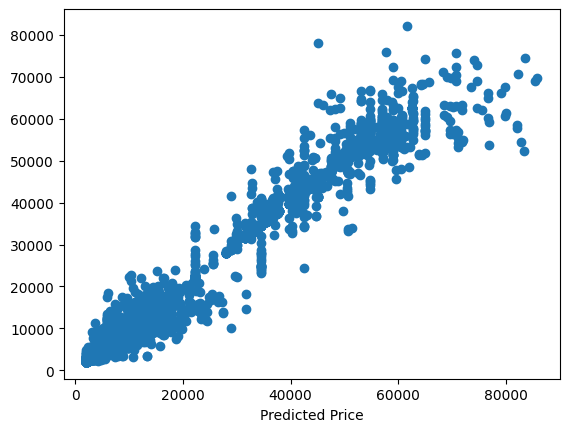

In [237]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")

In [254]:
important_features_dict = dict(zip(rfr.feature_names_in_, rfr.feature_importances_))
sorted_importances = list(sorted(important_features_dict.items(), key=lambda item: item[1], reverse=True))
sorted_importances

[('class', np.float64(0.8752205072255453)),
 ('duration', np.float64(0.06729871962576411)),
 ('days_left', np.float64(0.025592656068198733)),
 ('airline_Air_India', np.float64(0.0048944761214484885)),
 ('airline_Vistara', np.float64(0.004729845110817146)),
 ('d_city_Bangalore', np.float64(0.0030943521764060606)),
 ('arr_time_Afternoon', np.float64(0.002330714316342354)),
 ('d_city_Kolkata', np.float64(0.0018706518957298211)),
 ('arr_time_Night', np.float64(0.0016428775780591835)),
 ('dep_time_Morning', np.float64(0.0016200829231166254)),
 ('dep_time_Early_Morning', np.float64(0.0015014528031271615)),
 ('d_city_Mumbai', np.float64(0.0014747660907098717)),
 ('dep_time_Evening', np.float64(0.0013179436068938074)),
 ('arr_time_Evening', np.float64(0.0010438407277980227)),
 ('airline_AirAsia', np.float64(0.0009601590540440688)),
 ('dep_time_Night', np.float64(0.000877511942077254)),
 ('dep_time_Afternoon', np.float64(0.0008528637852364266)),
 ('arr_time_Morning', np.float64(0.00078327188745

([0, 1, 2, 3, 4],
 [Text(0, 0, 'class'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'days_left'),
  Text(3, 0, 'airline_Air_India'),
  Text(4, 0, 'airline_Vistara')])

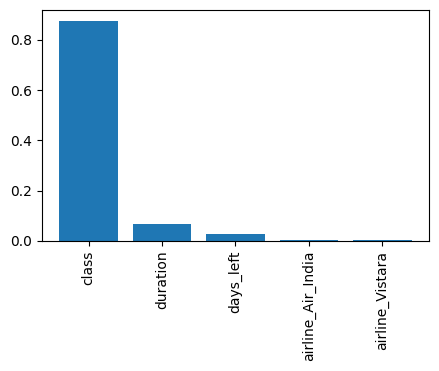

In [270]:
plt.figure(figsize=(5, 3))
plt.bar([x[0] for x in sorted_importances[0:5]], [x[1] for x in sorted_importances[0:5]])
plt.xticks(rotation='vertical')